In [1]:
import torch
from torch import optim

import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


torch.manual_seed(0)

In [2]:
def rastrigin(tensor, A=10):
    # https://en.wikipedia.org/wiki/Test_functions_for_optimization
    # https://github.com/jettify/pytorch-optimizer/blob/master/examples/viz_optimizers.py

    x, y = tensor
    A = 10
    f = (
        A * 2
        + (x ** 2 - A * torch.cos(x * math.pi * 2))
        + (y ** 2 - A * torch.cos(y * math.pi * 2))
    )
    return f

In [3]:
xmin, xmax, xstep = -5.12, 5.12, .2
ymin, ymax, ystep = -5.12, 5.12, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = rastrigin(torch.tensor([x, y])).numpy()

In [4]:
def optimise(p: torch.Tensor, optim: torch.optim.Optimizer):
    num_epochs = 100

    path = np.empty((num_epochs+1, 2))
    path[0] = p.detach().numpy()
    output_iter = np.empty(num_epochs+1)
    output_iter[0] = rastrigin(p, A=1)

    for epoch in range(num_epochs):
        optim.zero_grad()
        output = rastrigin(p, A=1)
        output.backward()
        optim.step()
        path[epoch] = p.detach().numpy()

        output_iter[epoch] = output


    return path, output_iter

In [5]:
# SGD
p_sgd = torch.tensor([5., 5.], requires_grad=True)
sgd = optim.SGD([p_sgd], lr=0.01)
path_sgd, output_sgd = optimise(p_sgd, sgd)

# SGD + Momentum
p_mom = torch.tensor([5., 5.], requires_grad=True)
mom = optim.SGD([p_mom], lr=0.01, momentum=0.9)
path_mom, output_mom = optimise(p_mom, mom)

# Adagrad
p_ada = torch.tensor([5., 5.], requires_grad=True)
ada = optim.Adagrad([p_ada], lr=0.01)
path_ada, output_ada = optimise(p_ada, ada)

# Adam
p_adam = torch.tensor([5., 5.], requires_grad=True)
adam = optim.Adam([p_adam], lr=0.01)
path_adam, output_adam = optimise(p_adam, adam)

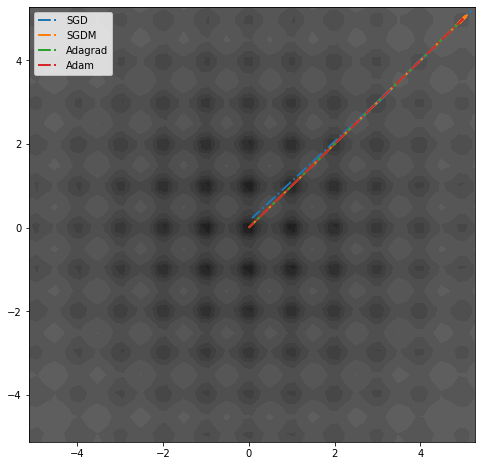

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)
ax.plot(path_sgd[:, 0], path_sgd[:, 1], label='SGD', linewidth=2, linestyle='-.')
ax.plot(path_mom[:, 0], path_mom[:, 1], label='SGDM', linewidth=2, linestyle='-.')
ax.plot(path_ada[:, 0], path_ada[:, 1], label='Adagrad', linewidth=2, linestyle='-.')
ax.plot(path_adam[:, 0], path_adam[:, 1], label='Adam', linewidth=2, linestyle='-.')
ax.legend()

In [10]:
# fig.savefig("report/Figures/contour_plot.pdf")

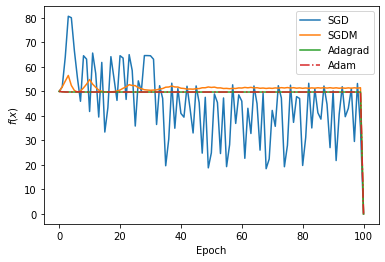

In [34]:
fig, ax = plt.subplots()
ax.plot(output_sgd, label="SGD")
ax.plot(output_mom, label="SGDM")
ax.plot(output_ada, label="Adagrad")
ax.plot(output_adam, label="Adam", linestyle='-.')
ax.set(xlabel="Epoch", ylabel="$f(x)$")
ax.legend()

In [11]:
# fig.savefig("report/Figures/learning_curve.pdf")